<a href="https://colab.research.google.com/github/SenorFoca/Artificial-Inteligence/blob/main/AI_CW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install yahooquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 22.5 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 5.3.1
    Uninstalling lxml-5.3.1:
      Successfully uninstalled lxml-5.3.1


In [ ]:
# Import libraries
from yahooquery import Ticker   # For fetching stock data from Yahoo Finance
import numpy as np              # For numerical operations
import pandas as pd             # For data manipulation and analysis
import datetime                 # For working with date and time
import seaborn as sns           # For statistical data visualization

# Define the stock ticker and date range
ticker = 'TTWO'
nvda = Ticker(ticker)
start_date = '2014-01-01'
end_date = '2024-12-31'

# Fetch historical daily stock prices from Yahoo Finance
dataset = nvda.history(start=start_date, end=end_date, interval='1d')

# Display the first few rows
dataset

/usr/local/lib/python3.11/dist-packages/yahooquery/utils/__init__.py:1470: FutureWarning: 'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.
  has_live_indice = index_utc[-1] >= last_trade - pd.Timedelta(2, "S")


open        high         low       close   volume  \
symbol date                                                                  
TTWO   2014-01-02   17.270000   17.540001   17.150000   17.530001   976100   
       2014-01-03   17.500000   17.750000   17.500000   17.629999   857300   
       2014-01-06   17.670000   17.750000   17.420000   17.600000  1190200   
       2014-01-07   17.639999   18.270000   17.520000   18.110001  2811700   
       2014-01-08   17.950001   18.170000   17.730000   17.799999  1452000   
...                       ...         ...         ...         ...      ...   
       2024-12-23  181.089996  183.369995  181.089996  183.220001  1198400   
       2024-12-24  184.000000  185.820007  183.630005  185.389999   461100   
       2024-12-26  184.750000  187.559998  184.710007  187.160004   733500   
       2024-12-27  187.429993  188.360001  184.699997  186.429993  1010700   
       2024-12-30  184.190002  185.929993  182.000000  184.539993  1317100   

                     adjclose  
symbol date                    
TTWO   2014-01-02   17.530001  
       2014-01-03   17.629999  
       2014-01-06   17.600000  
       2014-01-07   18.110001  
       2014-01-08   17.799999  
...                       ...  
       2024-12-23  183.220001  
       2024-12-24  185.389999  
       2024-12-26  187.160004  
       2024-12-27  186.429993  
       2024-12-30  184.539993  

[2767 rows x 6 columns]

# EDA Features Metrics

In [ ]:
# Remove any rows with missing values
dataset = dataset.dropna()
# Select relevant columns for analysis
dataset = dataset[['open', 'high', 'low', 'close', 'volume']]

# Calculate High-Low range of the day
dataset['H-L'] = dataset['high'] - dataset['low']
# Calculate Open-Close difference of the day
dataset['O-C'] = dataset['close'] - dataset['open']

In [ ]:
# Compute moving averages with different window sizes
dataset['3day_MA'] = dataset['close'].shift(1).rolling(window = 3).mean()
dataset['10day MA'] = dataset['close'].shift(1).rolling(window = 10).mean()
dataset['30day MA'] = dataset['close'].shift(1).rolling(window = 30).mean()

# Compute rolling standard deviation over a 5-day window
dataset['Std_dev']= dataset['close'].rolling(5).std()

# Compute Daily Returns
dataset['Daily_Return'] = dataset['close'].pct_change()

In [ ]:
# Create binary target variable: 1 if the next day's close is higher, 0 otherwise
dataset['Price_Rise'] = np.where(dataset['close'].shift(-1) > dataset['close'], 1, 0)

# Drop any remaining rows with NaN values
dataset = dataset.dropna()
dataset

open        high         low       close   volume  \
symbol date                                                                  
TTWO   2014-02-14   19.129999   19.410000   19.049999   19.110001  2072800   
       2014-02-18   19.280001   20.420000   19.250000   20.400000  6423000   
       2014-02-19   20.400000   20.490000   19.510000   19.570000  3751900   
       2014-02-20   19.500000   19.740000   19.350000   19.590000  1447200   
       2014-02-21   19.690001   19.850000   19.240000   19.290001  2004700   
...                       ...         ...         ...         ...      ...   
       2024-12-23  181.089996  183.369995  181.089996  183.220001  1198400   
       2024-12-24  184.000000  185.820007  183.630005  185.389999   461100   
       2024-12-26  184.750000  187.559998  184.710007  187.160004   733500   
       2024-12-27  187.429993  188.360001  184.699997  186.429993  1010700   
       2024-12-30  184.190002  185.929993  182.000000  184.539993  1317100   

                        H-L       O-C     3day_MA    10day MA    30day MA  \
symbol date                                                                 
TTWO   2014-02-14  0.360001 -0.019999   19.213332   18.660000   18.106333   
       2014-02-18  1.170000  1.119999   19.180000   18.653000   18.159000   
       2014-02-19  0.980000 -0.830000   19.573333   18.803000   18.251333   
       2014-02-20  0.389999  0.090000   19.693333   19.054000   18.317000   
       2014-02-21  0.610001 -0.400000   19.853333   19.213000   18.366333   
...                     ...       ...         ...         ...         ...   
       2024-12-23  2.279999  2.130005  181.750000  185.719998  185.284665   
       2024-12-24  2.190002  1.389999  182.190002  185.251999  185.461998   
       2024-12-26  2.849991  2.410004  183.526667  185.254999  185.661998   
       2024-12-27  3.660004 -1.000000  185.256668  184.924998  185.882332   
       2024-12-30  3.929993  0.349991  186.326665  184.603998  186.034332   

                    Std_dev  Daily_Return  Price_Rise  
symbol date                                            
TTWO   2014-02-14  0.123612     -0.005206           1  
       2014-02-18  0.544105      0.067504           0  
       2014-02-19  0.531385     -0.040686           1  
       2014-02-20  0.507523      0.001022           0  
       2014-02-21  0.494186     -0.015314           1  
...                     ...           ...         ...  
       2024-12-23  1.834159      0.006869           1  
       2024-12-24  1.612132      0.011844           1  
       2024-12-26  2.416429      0.009547           0  
       2024-12-27  2.183695     -0.003900           0  
       2024-12-30  1.552183     -0.010138           0  

[2737 rows x 13 columns]

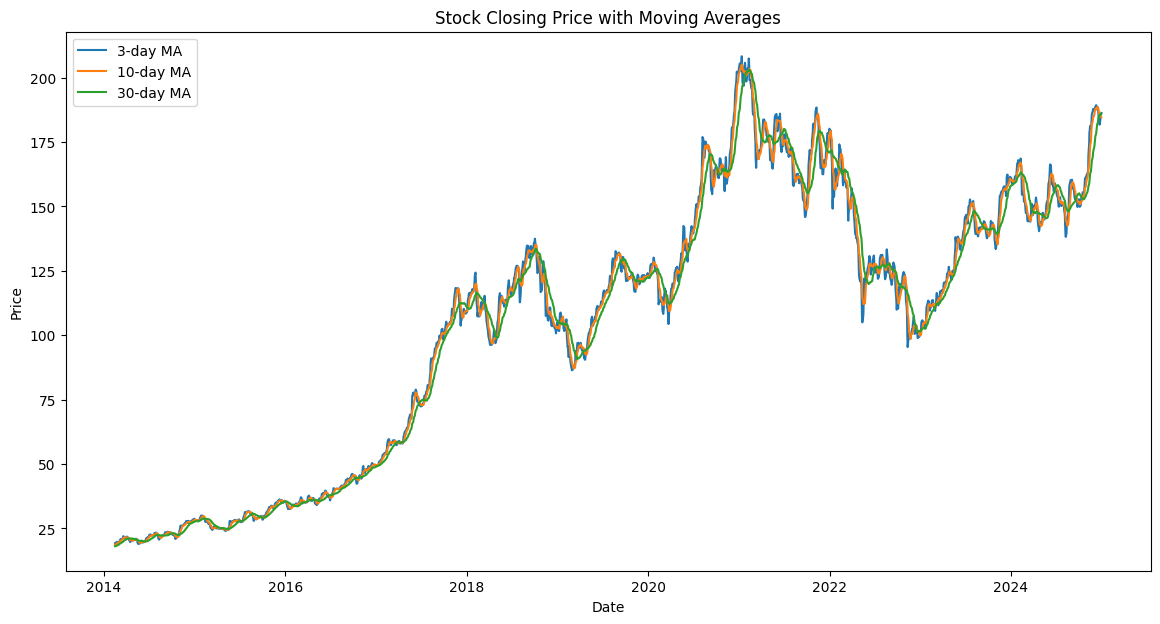

In [ ]:
# ---------------------- Plotting Moving Averages ----------------------
# Plot the computed moving averages over time using the date from the index level
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(dataset.index.get_level_values('date'), dataset['3day_MA'], label='3-day MA')
plt.plot(dataset.index.get_level_values('date'), dataset['10day MA'], label='10-day MA')
plt.plot(dataset.index.get_level_values('date'), dataset['30day MA'], label='30-day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Closing Price with Moving Averages')
plt.legend()
plt.show()

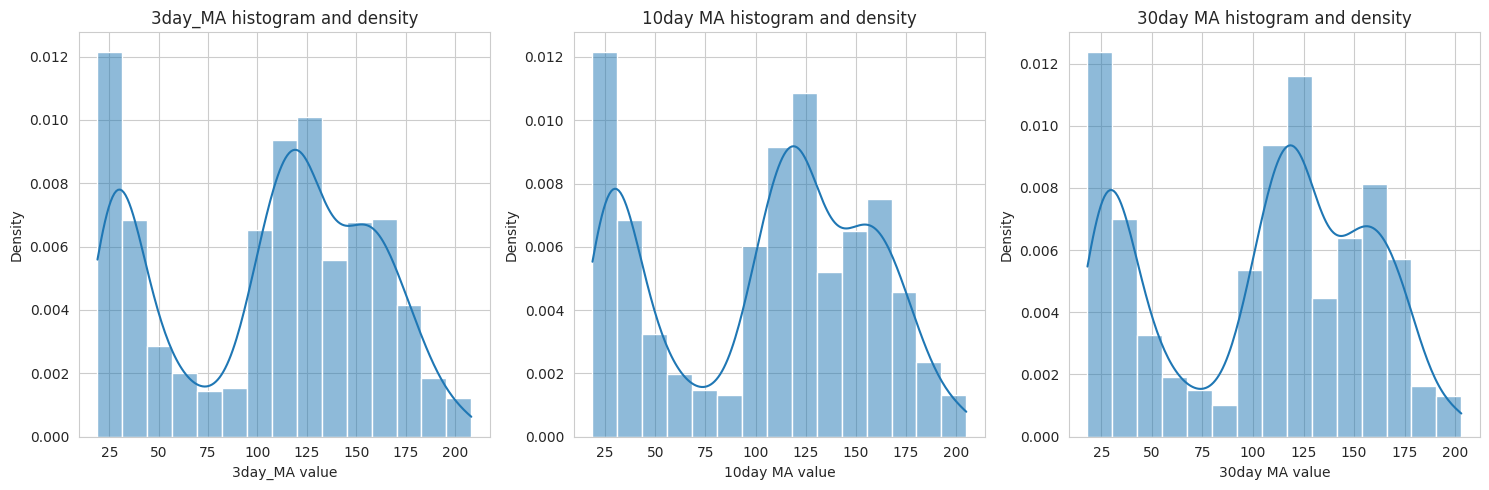

In [ ]:
# ---------------------- Histogram and Density Plots for Moving Averages ----------------------
# Set a style for a specific look
sns.set_style('whitegrid')

# Create a list of the moving average columns
ma_columns = ['3day_MA', '10day MA', '30day MA']

# Set up a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Loop through each moving average column and its corresponding subplot
for i, col in enumerate(ma_columns):
    sns.histplot(
        data=dataset,
        x=col,
        kde=True,            # Add kernel density estimate
        stat='density',      # Y-axis will represent density
        bins=15,             # Adjust number of bins as needed
        ax=axes[i]
    )
    axes[i].set_title(f'{col} histogram and density')
    axes[i].set_xlabel(f'{col} value')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

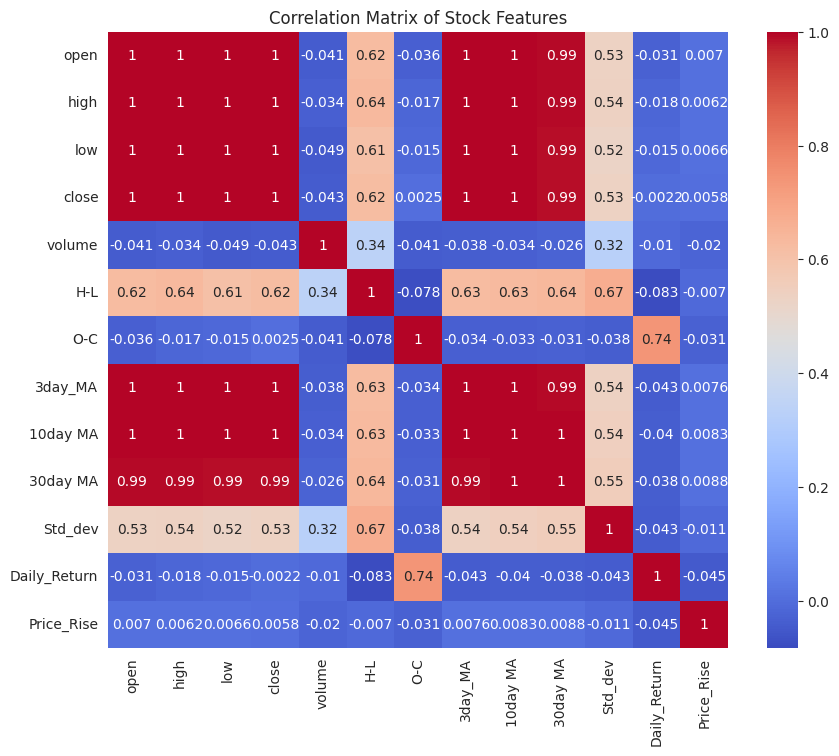

In [ ]:
# ---------------------- Correlation Matrix ----------------------
# Compute the correlation matrix only on numeric columns
corr_matrix = dataset.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Stock Features')
plt.show()


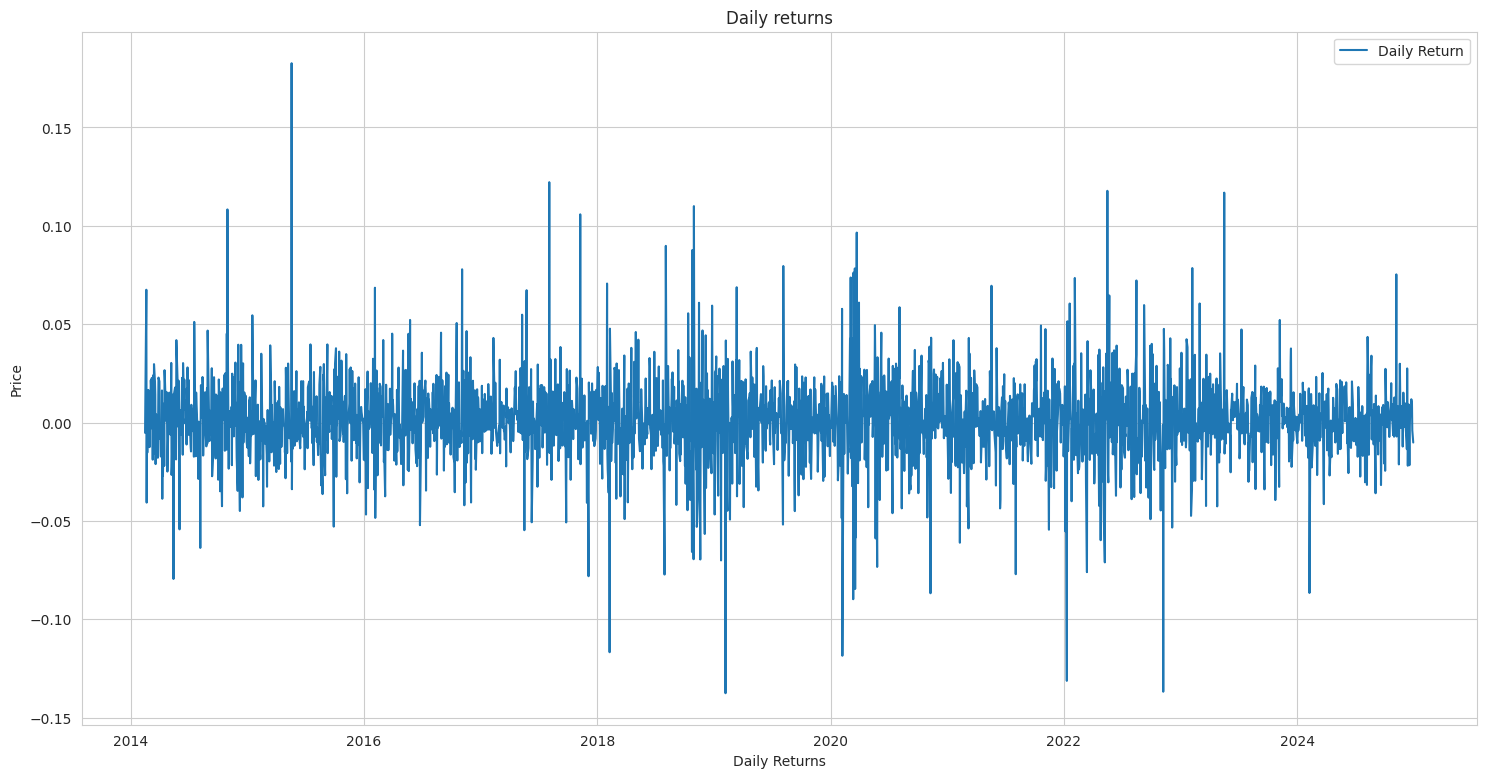

In [ ]:
# ---------------------- Daily Returns Plot ----------------------
plt.figure(figsize=(18,9))
plt.plot(dataset.index.get_level_values('date'), dataset['Daily_Return'], label='Daily Return')
plt.xlabel('Daily Returns')
plt.ylabel('Price')
plt.title('Daily returns')
plt.legend()
plt.show()

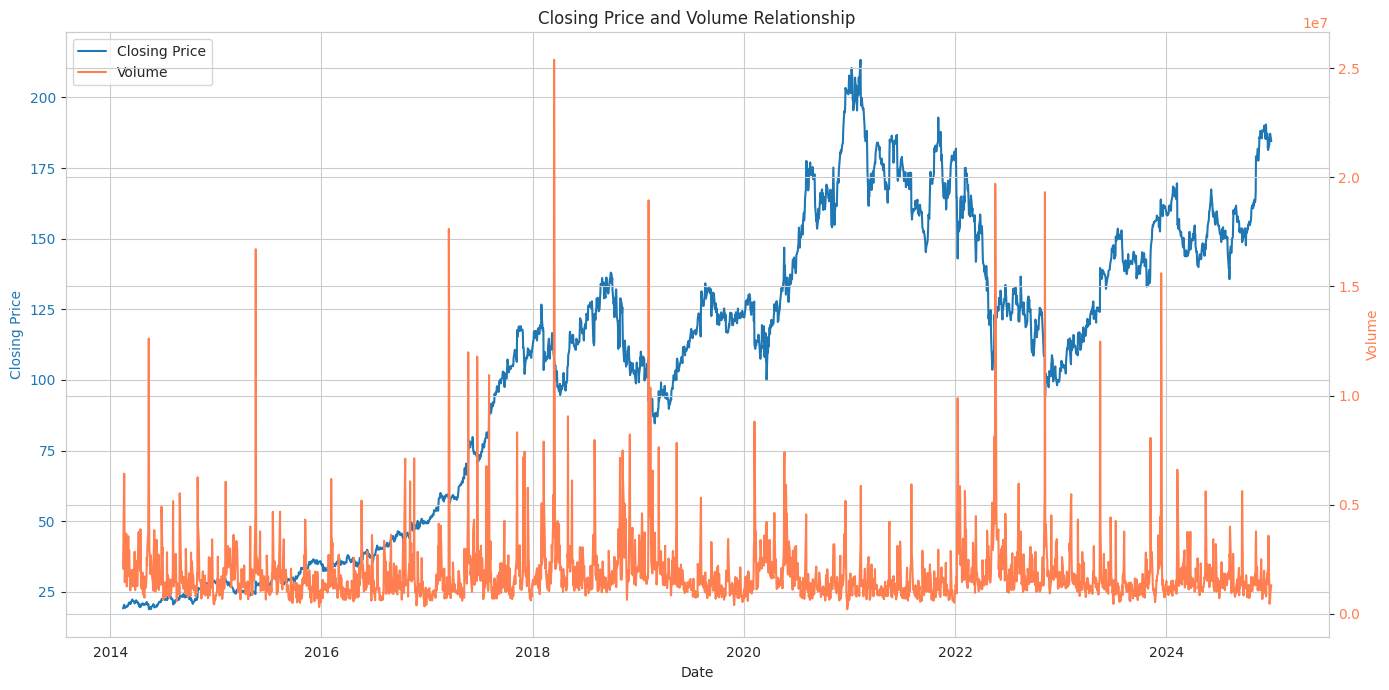

In [ ]:
# ---------------------- Closing Price and Volume Dual-Axis Plot ----------------------
# Create the figure and the first axis for Closing Price
fig, ax1 = plt.subplots(figsize=(14, 7))

color_price = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color=color_price)
line1 = ax1.plot(dataset.index.get_level_values('date'), dataset['close'], color=color_price, label='Closing Price')
ax1.tick_params(axis='y', labelcolor=color_price)

# Create a twin axis for Volume
ax2 = ax1.twinx()
color_volume = 'coral'
ax2.set_ylabel('Volume', color=color_volume)
line2 = ax2.plot(dataset.index.get_level_values('date'), dataset['volume'], color=color_volume, label='Volume')
ax2.tick_params(axis='y', labelcolor=color_volume)

# Combine both legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.title('Closing Price and Volume Relationship')
fig.tight_layout()
plt.show()

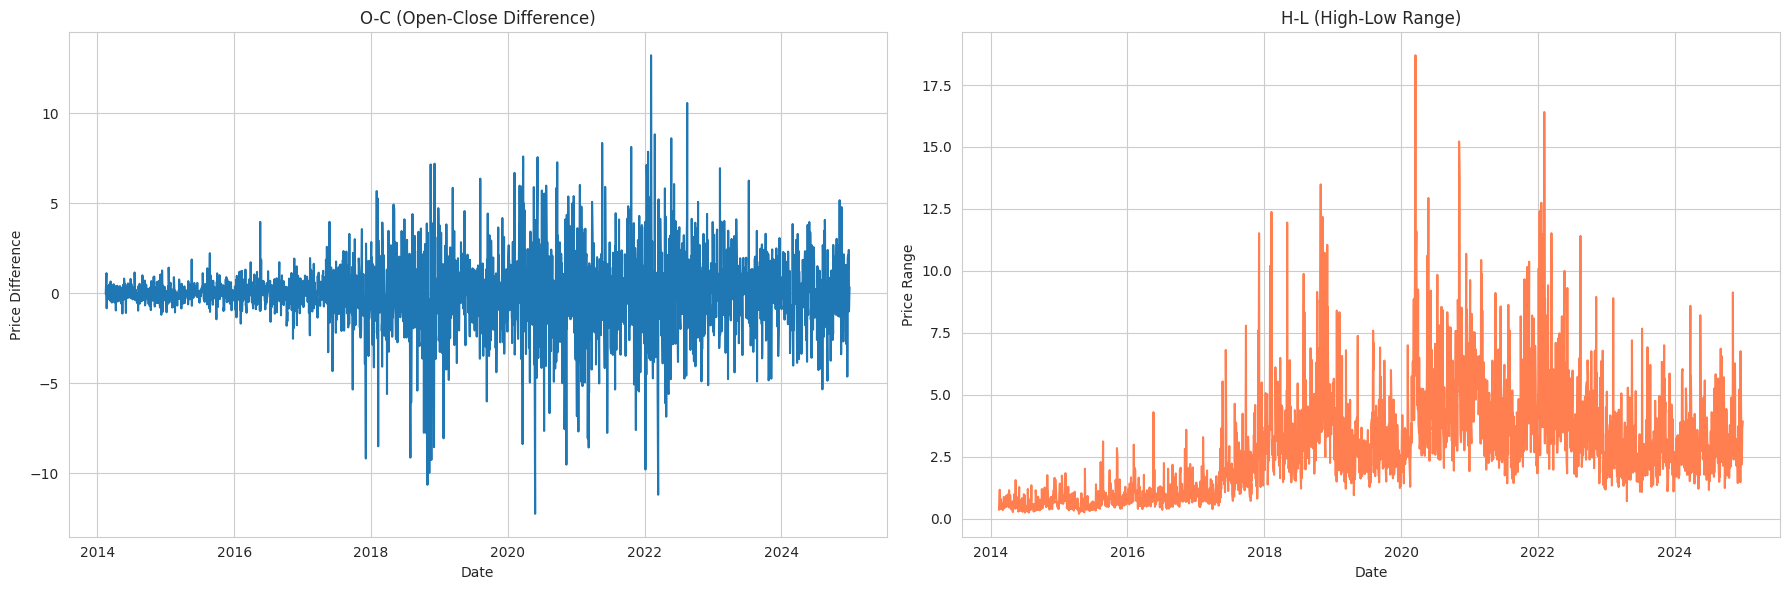

In [ ]:
# ---------------------- O-C and H-L Subplots ----------------------
# Convert 'date' column to datetime if not already
if 'date' in dataset.columns and not pd.api.types.is_datetime64_any_dtype(dataset['date']):
    dataset['date'] = pd.to_datetime(dataset['date'])

# Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), sharex=True)

# Plot O-C
axes[0].plot(dataset.index.get_level_values('date'), dataset['O-C'], color='tab:blue')
axes[0].set_title('O-C (Open-Close Difference)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price Difference')

# Plot H-L
axes[1].plot(dataset.index.get_level_values('date'), dataset['H-L'], color='coral')
axes[1].set_title('H-L (High-Low Range)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price Range')



plt.tight_layout()
plt.show()

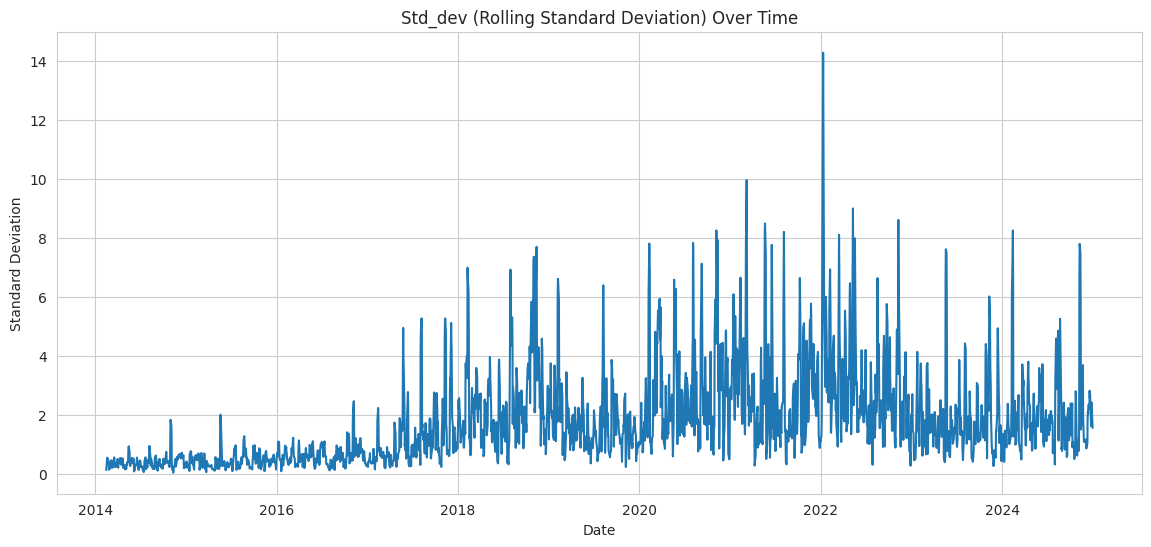

In [ ]:
# ---------------------- Rolling Standard Deviation Plot ----------------------
# Plot Std_dev (Rolling Standard Deviation)
plt.figure(figsize=(14, 6))
plt.plot(dataset.index.get_level_values('date'), dataset['Std_dev'], color='tab:blue')
plt.title('Std_dev (Rolling Standard Deviation) Over Time')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.show()

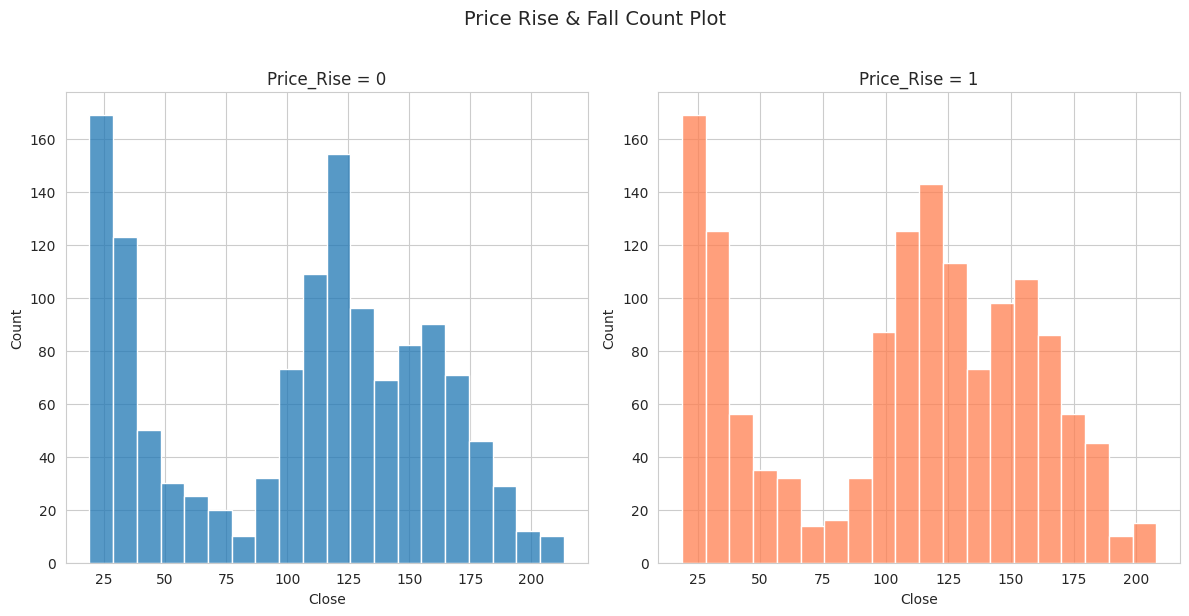

In [ ]:
# ---------------------- Price Rise Histograms ----------------------
# Two subplots: one for Price_Rise=0 and one for Price_Rise=1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left: Histogram of close prices where Price_Rise = 0
sns.histplot(
    x='close',
    data=dataset[dataset['Price_Rise'] == 0],
    bins=20,
    ax=ax1,
    color='tab:blue'
)
ax1.set_title('Price_Rise = 0')
ax1.set_xlabel('Close')
ax1.set_ylabel('Count')

# Right: Histogram of close prices where Price_Rise = 1
sns.histplot(
    x='close',
    data=dataset[dataset['Price_Rise'] == 1],
    bins=20,
    ax=ax2,
    color='coral'
)
ax2.set_title('Price_Rise = 1')
ax2.set_xlabel('Close')
ax2.set_ylabel('Count')

plt.suptitle('Price Rise & Fall Count Plot', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Train sets


In [ ]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
# Drop 'date' and the target 'Price_Rise' from the features
X = dataset.drop(columns=['Price_Rise'])
y = dataset['Price_Rise']

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_test

open        high         low       close   volume  \
symbol date                                                                  
TTWO   2022-10-25  123.570000  125.610001  122.730003  125.029999  1309100   
       2022-10-26  124.029999  126.400002  122.809998  123.620003  1435200   
       2022-10-27  123.639999  125.320000  121.349998  122.739998  1268800   
       2022-10-28  122.779999  124.279999  122.239998  124.019997  1388200   
       2022-10-31  123.370003  123.470001  117.650002  118.480003  2593500   
...                       ...         ...         ...         ...      ...   
       2024-12-23  181.089996  183.369995  181.089996  183.220001  1198400   
       2024-12-24  184.000000  185.820007  183.630005  185.389999   461100   
       2024-12-26  184.750000  187.559998  184.710007  187.160004   733500   
       2024-12-27  187.429993  188.360001  184.699997  186.429993  1010700   
       2024-12-30  184.190002  185.929993  182.000000  184.539993  1317100   

                        H-L       O-C     3day_MA    10day MA    30day MA  \
symbol date                                                                 
TTWO   2022-10-25  2.879997  1.459999  124.183334  120.255000  118.622334   
       2022-10-26  3.590004 -0.409996  124.563334  121.249001  118.556000   
       2022-10-27  3.970001 -0.900002  123.920001  121.956001  118.404667   
       2022-10-28  2.040001  1.239998  123.796666  122.344000  118.215000   
       2022-10-31  5.820000 -4.889999  123.459999  122.964000  118.209334   
...                     ...       ...         ...         ...         ...   
       2024-12-23  2.279999  2.130005  181.750000  185.719998  185.284665   
       2024-12-24  2.190002  1.389999  182.190002  185.251999  185.461998   
       2024-12-26  2.849991  2.410004  183.526667  185.254999  185.661998   
       2024-12-27  3.660004 -1.000000  185.256668  184.924998  185.882332   
       2024-12-30  3.929993  0.349991  186.326665  184.603998  186.034332   

                    Std_dev  Daily_Return  
symbol date                                
TTWO   2022-10-25  1.276355      0.015596  
       2022-10-26  1.015382     -0.011277  
       2022-10-27  1.223418     -0.007119  
       2022-10-28  0.887034      0.010429  
       2022-10-31  2.539549     -0.044670  
...                     ...           ...  
       2024-12-23  1.834159      0.006869  
       2024-12-24  1.612132      0.011844  
       2024-12-26  2.416429      0.009547  
       2024-12-27  2.183695     -0.003900  
       2024-12-30  1.552183     -0.010138  

[548 rows x 12 columns]

In [ ]:
# Standardize the feature
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=10000)

# Train the model on the training data
logistic_model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_lr = logistic_model.predict(X_test)


In [ ]:
# Evaluate the model's performance with a classification report
print("Logistic Regression Classification Report:")
print(classification_report(Y_test, Y_pred_lr))

# Calculate metrics for Logistic Regression
accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
precision_lr = precision_score(Y_test, Y_pred_lr)
recall_lr = recall_score(Y_test, Y_pred_lr)

# Create a DataFrame for Logistic Regression
metrics_lr = pd.DataFrame({
    "Metric": ["Accuracy:", "Precision:", "Recall:"],
    "Value": [accuracy_lr, precision_lr, recall_lr]
})

print("\nLogistic Regression Metrics:\n")
print(metrics_lr)
print("\n")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.13      0.20       250
           1       0.54      0.85      0.66       298

    accuracy                           0.52       548
   macro avg       0.48      0.49      0.43       548
weighted avg       0.48      0.52      0.45       548


Logistic Regression Metrics:

       Metric     Value
0   Accuracy:  0.520073
1  Precision:  0.537155
2     Recall:  0.848993




In [ ]:
# Logistic Regression CV
cv_scores_lr = cross_val_score(logistic_model, X_train, Y_train, cv=5, scoring='accuracy')
print("\nLogistic Regression CV Accuracy:")
print("Mean Accuracy: {:.4f}".format(cv_scores_lr.mean()))
print("Standard Deviation: {:.4f}".format(cv_scores_lr.std()))


Logistic Regression CV Accuracy:
Mean Accuracy: 0.5263
Standard Deviation: 0.0171


# Extra Trees

In [ ]:
# Import libraries
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize and train the Extra Trees classifier
classifier = ExtraTreesClassifier(random_state=101)
classifier.fit(X_train, Y_train)

ExtraTreesClassifier(random_state=101)

In [ ]:
# Predict using the Extra Trees classifier on the test set
Y_pred = classifier.predict(X_test)
print (classification_report(Y_test, Y_pred))

# Calculate metrics for Extra Trees
accuracy_et = accuracy_score(Y_test, Y_pred)
precision_et = precision_score(Y_test, Y_pred)
recall_et = recall_score(Y_test, Y_pred)

# Create a DataFrame for Extra Trees
metrics_et = pd.DataFrame({
    "Metric": ["Accuracy:", "Precision:", "Recall:"],
    "Value": [accuracy_et, precision_et, recall_et]
})

print("\nExtra Trees Metrics:\n")
print(metrics_et)
print("\n")

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       250
           1       0.54      0.58      0.56       298

    accuracy                           0.50       548
   macro avg       0.49      0.49      0.49       548
weighted avg       0.50      0.50      0.50       548


Extra Trees Metrics:

       Metric     Value
0   Accuracy:  0.501825
1  Precision:  0.538941
2     Recall:  0.580537




In [ ]:
# Perform cross-validation on the Extra Trees model
extra_trees_model = ExtraTreesClassifier(random_state=101)
cv_scores_et = cross_val_score(extra_trees_model, X_train, Y_train, cv=5, scoring='accuracy')
print("Extra Trees Classifier CV Accuracy:")
print("Mean Accuracy: {:.4f}".format(cv_scores_et.mean()))
print("Standard Deviation: {:.4f}".format(cv_scores_et.std()))

Extra Trees Classifier CV Accuracy:
Mean Accuracy: 0.4742
Standard Deviation: 0.0180


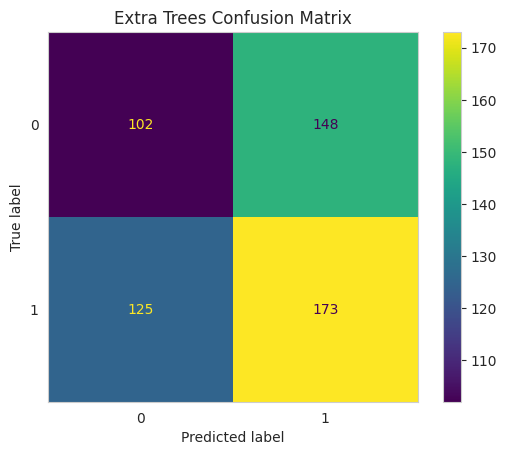

In [ ]:
# Display a confusion matrix for the Extra Trees classifier
matrix = ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test)
plt.title('Extra Trees Confusion Matrix')
plt.grid(False)
plt.show(matrix)
plt.show()

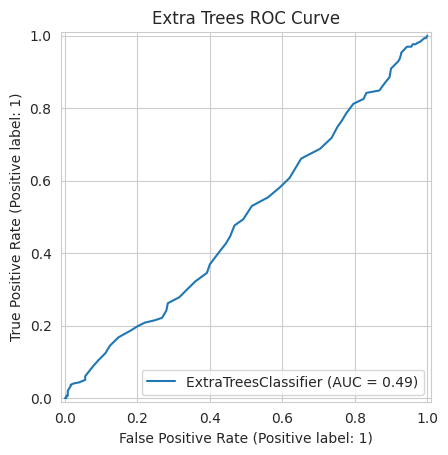

In [ ]:
# Plot the ROC curve for the Extra Trees classifier
roc_disp = RocCurveDisplay.from_estimator(classifier, X_test, Y_test)
plt.title("Extra Trees ROC Curve")
plt.show()

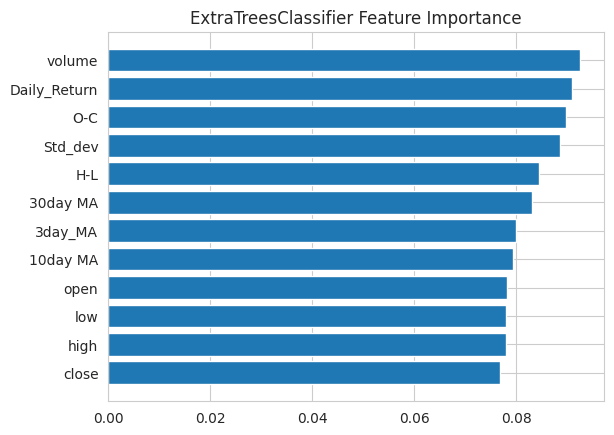

In [ ]:
# Plot feature importances for the Extra Trees classifier
feature_names=X.columns     # Get the feature names from the original DataFrame

importance = classifier.feature_importances_    # Extract importance values
indices = np.argsort(importance)                # Get indices to sort the features by importance
range1 = range(len(importance[indices]))
plt.figure()
plt.title("ExtraTreesClassifier Feature Importance")
plt.barh(range1,importance[indices])
plt.yticks(range1, feature_names[indices])
plt.ylim([-1, len(range1)])
plt.show()

#Trading Strategies

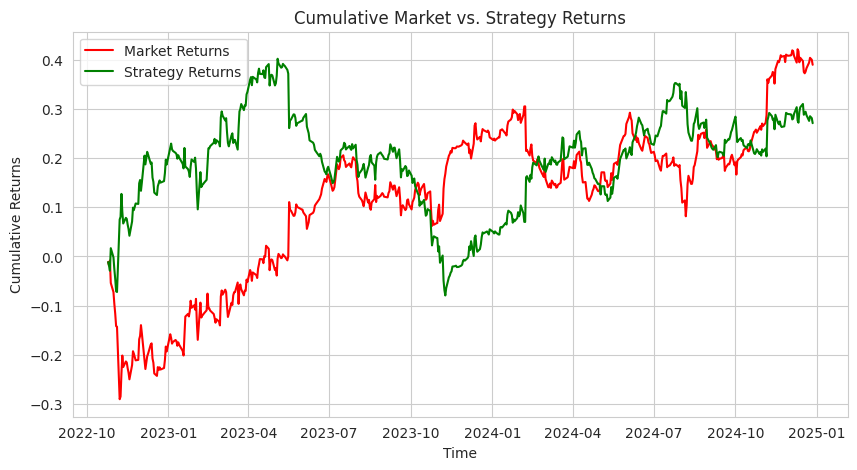

In [ ]:
# Create a new column 'Y_pred' filled with NaNs.
dataset['Y_pred'] = np.nan
# Because you split without shuffling, the test set corresponds to the last len(Y_pred) rows.
dataset.iloc[len(X_train):, dataset.columns.get_loc('Y_pred')] = Y_pred

# Drop rows without a prediction to create a trade_dataset
trade_dataset = dataset.dropna(subset=['Y_pred']).copy()


# We use the 'close' column; make sure the column name matches your dataset.
# Calculate log returns, which are often used for financial time series.
trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['close'] / trade_dataset['close'].shift(1))
# Shift the returns upward so that each row's return represents the return for the next day.
trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(-1)


# The strategy goes long (takes the day's return) if the prediction is 1 (price rise),
# and short (takes the negative of the return) if the prediction is 0.
trade_dataset['Strategy Returns'] = np.where(trade_dataset['Y_pred'] == 1,
                                               trade_dataset['Tomorrows Returns'],
                                               -trade_dataset['Tomorrows Returns'])


# Compute the cumulative sum of both the market returns and the strategy returns over time
trade_dataset['Cumulative Market Returns'] = trade_dataset['Tomorrows Returns'].cumsum()
trade_dataset['Cumulative Strategy Returns'] = trade_dataset['Strategy Returns'].cumsum()


plt.figure(figsize=(10, 5))
plt.plot(trade_dataset.index.get_level_values('date'), trade_dataset['Cumulative Market Returns'], color='red', label='Market Returns')
plt.plot(trade_dataset.index.get_level_values('date'), trade_dataset['Cumulative Strategy Returns'], color='green', label='Strategy Returns')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Market vs. Strategy Returns')
plt.legend()
plt.show()
